In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import fresnel

In [15]:
#Problem 1
def f(x):
    return np.cos((np.pi/2)*x)

Right Hand Rule
N = 8: R = 0.5625175339264112, error = 2.1738e-01
N = 16: R = 0.6027045562576071, error = 1.7719e-01
N = 32: R = 0.6203545223199909, error = 1.5954e-01
N = 64: R = 0.6286502835668281, error = 1.5124e-01
N = 128: R = 0.6326746486756197, error = 1.4722e-01


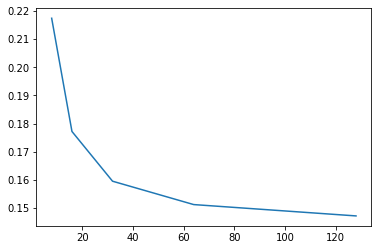

In [16]:
a, b = 0, 1
I = fresnel(1)[1]

nArray = np.array([8,16,32,64,128])
errR = np.array([])
#a
print('Right Hand Rule')
for N in nArray:
    h = (b-a)/(N-1)
    x = np.linspace(a,b,N)
    R = h*np.sum(f(x[1:]))
    
    err = np.fabs(I-R)
    errR = np.append(errR,[err])
    
    print('N = {}: R = {}, error = {:2.4e}'.format(N,R,err))
plt.plot(nArray,errR);

Left Hand Rule
N = 8: L = 0.705374676783554, error = 7.4519e-02
N = 16: L = 0.6693712229242739, error = 1.1052e-01
N = 32: L = 0.65261258683612, error = 1.2728e-01
N = 64: L = 0.644523299439844, error = 1.3537e-01
N = 128: L = 0.6405486644236512, error = 1.3934e-01


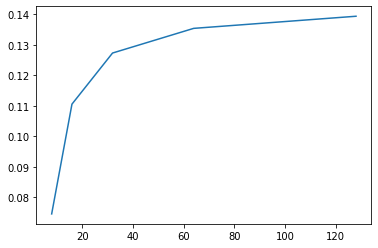

In [17]:
errL = np.array([])
#b
print('Left Hand Rule')
for N in nArray:
    h = (b-a)/(N-1)
    x = np.linspace(a,b,N)
    L = h*np.sum(f(x[:-1]))
    
    err = np.fabs(I-L)
    errL = np.append(errL,[err])
    
    print('N = {}: L = {}, error = {:2.4e}'.format(N,L,err))
plt.plot(nArray,errL);

Midpoint Hand Rule
N = 8: I = 0.637957447884322, error = 1.4194e-01
N = 16: I = 0.6369107536432467, error = 1.4298e-01
N = 32: I = 0.6366878834483174, error = 1.4321e-01
N = 64: I = 0.6366362629278496, error = 1.4326e-01
N = 128: I = 0.6366238302843139, error = 1.4327e-01


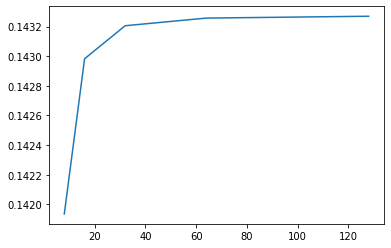

In [18]:
errM = np.array([])
#c
print('Midpoint Hand Rule')
for N in nArray:
    h = (b-a)/(N-1)
    x = np.linspace(a,b,N)
    c = (x[:-1]+x[1:])/2
    M = h*np.sum(f(c))
    
    err = np.fabs(I-M)
    errM = np.append(errM,[err])
    
    print('N = {}: I = {}, error = {:2.4e}'.format(N,M,err))
plt.plot(nArray,errM);

Composite Trapezoidal Rule
N = 8: I = 0.6339461053549826, error = 1.4595e-01
N = 16: I = 0.6360378895909404, error = 1.4386e-01
N = 32: I = 0.6364835545780554, error = 1.4341e-01
N = 64: I = 0.6365867915033361, error = 1.4331e-01
N = 128: I = 0.6366116565496355, error = 1.4328e-01


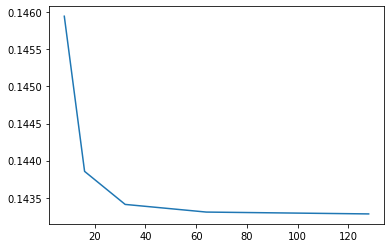

In [19]:
errT = np.array([])
#d
print('Composite Trapezoidal Rule')
for N in nArray:
    h = (b-a)/(N-1)
    x = np.linspace(a,b,N)
    L = h*np.sum(f(x[:-1]))
    R = h*np.sum(f(x[1:]))
    T = (L + R)/2
    
    err = np.fabs(I-T)
    errT = np.append(errT,[err])
    
    print('N = {}: I = {}, error = {:2.4e}'.format(N,T,err))
plt.plot(nArray,errT);

Simpson's Rule
N = 8: S = 0.6206671813594412, error = 1.5923e-01
N = 16: S = 0.6331327261929587, error = 1.4676e-01
N = 32: S = 0.6358026987474406, error = 1.4409e-01
N = 64: S = 0.6364219008502323, error = 1.4347e-01
N = 128: S = 0.6365710782875971, error = 1.4332e-01


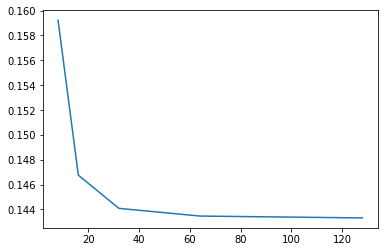

In [20]:
errS = np.array([])
#e
print('Simpson\'s Rule')
for N in nArray:
    h = (b-a)/(N-1)
    x = np.linspace(a,b,N)
    
    w = np.ones(N)
    w[1:-1:2] = 4
    w[2:-2:2] = 2
    S = (h/3)*np.dot(f(x),w)
    
    err = np.fabs(I-S)
    errS = np.append(errS,[err])
    
    print('N = {}: S = {}, error = {:2.4e}'.format(N,S,err))
plt.plot(nArray,errS);

In [21]:
#Problem 3
def f2(x):
    return (np.sin(x)/x)-(np.exp(-.2*(x**2)))

#steffensen's method
def steffensens(x,f):
    fp = (f(x+f(x))-f(x))/f(x)
    
    if fp == 0:
        print(x)
    return fp #(f(x+f(x))-f(x))/f(x)

#Netwons Method
def newton(x, MAXITS = 10, tol = 1e-8):
    nits = 0
    error = 1
    while nits < MAXITS and error > tol:
        eta = f2(x)/steffensens(x,f2)
        x -= eta
        error = np.fabs(eta)
        nits += 1
    return x, nits, error

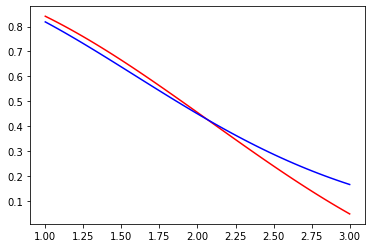

In [22]:
x = np.linspace(1,3)
y1 = (np.sin(x)/x)
y2 = np.exp(-.2*(x**2))

plt.plot(x, y1, 'r', x, y2, 'b');

Root = 2.066393863299667 in 4 iterations with error 3.83059898e-11.


C:\Users\CollinsJacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


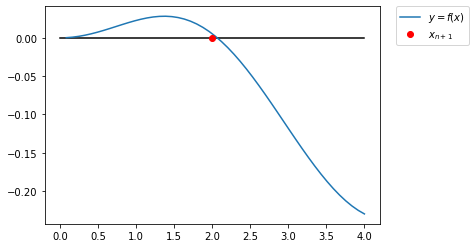

In [23]:
x = np.linspace(0,4)
p = 2
tolerance = 10**(-8)

xn, nn, err = newton(p) # using default arguments
print('Root = {} in {:d} iterations with error {:1.8e}.'.format(xn, nn, err))

plt.plot(x,0*x,'k') # x-axis
plt.plot(x,f2(x),label = '$y = f(x)$') # find zero of this function
#plt.plot(p,0,'bo',label='$nx_n$') #current iterate
#plt.plot(x,la,'g',linewidth=2,label='linear approximation') # tangent line

#pold = p
#p = p - f2(p)/steffensens(p,f2)

plt.plot(p,0,'ro',label = '$x_{n+1}$') #next iterate
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.0);

In [24]:
#Problem 4
#function to pay off 30-year mortgage
def A(r):
    P = 1200
    mortgage = 199000
    return (P/(r/12))*(1-(1+(r/12))**(-360)) - mortgage

#Netwons Method
def newton2(x, MAXITS = 10, tol = 1e-8):
    nits = 0
    error = 1
    while nits < MAXITS and error > tol:
        eta = A(x)/steffensens(x,A)
        x -= eta
        error = np.fabs(eta)
        nits += 1
    return x, nits, error

432000


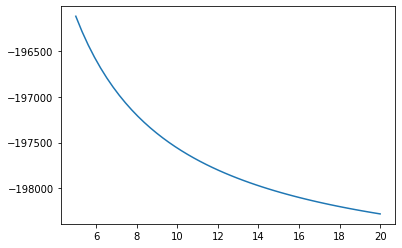

In [13]:
#x1 = np.linspace(0,36)
totalPayments = 1200*12*30
print(totalPayments)
x1 = 2
xs = np.linspace(5,20)
ys = A(xs)
#m = newton2(x1)

plt.plot(xs,ys);
#print(m)